In [1]:
import pickle
from pprint import pprint
import pandas as pd

In [3]:
# 데이터 불러오기
with open("./cleaned_data.pk", "rb") as f:
    data = pickle.load(f)

# 데이터 수정
data.reset_index(inplace=True, drop=True)

# 데이터 확인
print(data.info())
print(data.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2223 entries, 0 to 2222
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     2223 non-null   object
 1   User     2223 non-null   object
 2   Message  2223 non-null   object
dtypes: object(3)
memory usage: 52.2+ KB
None
                     Date          User                   Message
2218  2021-03-30 10:19:34    Rt회계학과 양윤철  내친구 댕기는 회사는 전액 회사 부담이라서 
2219  2021-03-30 10:19:41  Rt글로벌비즈니스최성진                         굿
2220  2021-03-30 10:19:42  Rt글로벌비즈니스최성진                       복지굿
2221  2021-03-30 10:19:54  Rt글로벌비즈니스최성진                  너가 건의해봐 
2222  2021-03-30 10:20:29  Rt글로벌비즈니스최성진                   장우용 핼맷컷


In [4]:
# 사용자 파악
users = set(data['User'])
users

{'Rt건축공학조수영',
 'Rt경영조현준',
 'Rt글로벌비즈니스최성진',
 'Rt김근형',
 'Rt무역학과이용석',
 'Rt무역학과장우용',
 'Rt법학차진영',
 'Rt정보통신공학과전민재',
 'Rt회계학과 양윤철',
 '이현수'}

In [5]:
# 사용자 별로 데이터 묶기
authors = data.groupby('User')
pprint(authors.groups)
print(type(authors.groups))

{'Rt건축공학조수영': Int64Index([57, 58, 76, 77, 78, 86, 87, 88, 89, 90, 92, 93, 94, 527, 1690,
            1919, 2203],
           dtype='int64'),
 'Rt경영조현준': Int64Index([   1,    2,    3,    4,    7,    8,    9,   10,   11,   12,
            ...
            2159, 2187, 2188, 2189, 2190, 2191, 2195, 2196, 2207, 2209],
           dtype='int64', length=480),
 'Rt글로벌비즈니스최성진': Int64Index([  81,   82,  105,  114,  115,  117,  118,  125,  126,  127,
            ...
            2200, 2201, 2210, 2211, 2216, 2217, 2219, 2220, 2221, 2222],
           dtype='int64', length=521),
 'Rt김근형': Int64Index([520, 523, 1269, 1270, 1276], dtype='int64'),
 'Rt무역학과이용석': Int64Index([1543, 1545], dtype='int64'),
 'Rt무역학과장우용': Int64Index([   6,   13,   36,   37,   44,   45,   48,   49,   51,   53,
            ...
            2114, 2115, 2119, 2122, 2124, 2174, 2175, 2176, 2177, 2184],
           dtype='int64', length=612),
 'Rt법학차진영': Int64Index([   0,   29,   30,   59,   95,   96,  100,  275,  515,  516,  519,
    

In [9]:
# 사용자 별로 묶은 데이터를 사용가능한 데이터 타입으로 바꾸기
author2doc = {}

for user, index in authors.groups.items():
    author2doc[user] = list(index)
    
print(author2doc)

{'Rt건축공학조수영': [57, 58, 76, 77, 78, 86, 87, 88, 89, 90, 92, 93, 94, 527, 1690, 1919, 2203], 'Rt경영조현준': [1, 2, 3, 4, 7, 8, 9, 10, 11, 12, 14, 16, 17, 18, 20, 23, 24, 25, 26, 28, 31, 32, 33, 34, 35, 38, 39, 40, 41, 42, 43, 46, 47, 50, 55, 56, 60, 61, 62, 65, 67, 68, 69, 70, 73, 74, 75, 80, 162, 163, 168, 171, 172, 173, 177, 179, 180, 184, 186, 187, 193, 194, 195, 198, 200, 204, 205, 209, 210, 213, 216, 218, 220, 223, 224, 229, 234, 236, 238, 244, 249, 252, 256, 261, 262, 264, 265, 272, 273, 277, 279, 285, 286, 287, 289, 290, 291, 292, 293, 312, 313, 314, 351, 352, 353, 356, 357, 446, 447, 448, 450, 452, 453, 454, 460, 461, 462, 463, 466, 468, 469, 472, 473, 474, 475, 476, 478, 479, 483, 484, 485, 486, 487, 500, 502, 505, 513, 525, 535, 542, 546, 549, 551, 552, 555, 556, 569, 572, 578, 582, 588, 589, 592, 593, 594, 597, 601, 604, 608, 617, 621, 622, 625, 628, 631, 632, 637, 658, 664, 667, 669, 671, 672, 673, 674, 676, 679, 680, 683, 686, 687, 689, 693, 694, 697, 701, 703, 705, 706, 710, 71

In [13]:
# 첫 번째 유저에 대한 카카오톡 내용 확인
user1_msg = [str(data["Message"][idx])for idx in author2doc["Rt건축공학조수영"]]
user1_msg

['담주 수요일부터 임원 모집 예정임',
 '56기',
 '☆☆☆☆☆56기 총 동기회 임원선출☆☆☆☆☆\n \n반갑습니다 56기 총 동기회장 조수영입니다\n함께 56기 동기회를 이끌어 갈 임원들을 찾습니다\nROTC 56기 총 동기회의 회장으로서 책임감 있고 멋지게 이끌어 갈 인재라면 누구든 환영입니다 리더십있고 책임감 있는 56기 여러분들의 많은 지원 바랍니다\n \n전국적으로 임원들을 선출할 예정입니다 전국이 56기 동기 여러분의 참여유도와 단합을 위하여 각 도의 지사회장 및 지사부회장 특별·광역시의 회장을 선출합니다 각 지역의 인원들과 협력을 도모하여 함께 성장하는 56기를 만들고 싶습니다\n \n또한 현재 공석인 임원을 선출합니다\n \n■ 지원보직\n1 인사국장\n2 조직준비위원장\n3 감사\n4 감사부위원장\n5 여군대표\n6 기획국장\n7 대외협력국장\n8 간사\n9 강원도지사회장\n10 경기도지사회장\n11 충청도지사회장\n12 전라도지사회장\n13 경상도지사회장\n14 제주도지사회장\n15 강원도 북부 지사부회장\n16 강원도 남부 지사부회장\n17 경기도 북부 지사부회장\n18 경기도 남부 지사부회장\n19 충청북도 지사부회장\n20 충청남도 지사부회장\n21 전라북도 지사부회장\n22 전라남도 지사부회장\n23 경상북도 지사부회장\n24 경상남도 지사부회장\n25 서울득별시회장\n26 인청광역시회장\n27 대전광역시회장\n28 대구광역시회장\n29 울산광역시회장\n30 부산광역시회장\n31 광주광역시회장\n \n■ 기간\n 2021021020210228\n \n임원의 임무는 적극적인 참석과 제안입니다 각 역할에 대한 업무가 있으며 그에 대하여 책임감 있게 이행해줄 동기를 찾습니다 \n \n중앙회의 장점으로는 많은 선후배와의 교류 및 동기들과의 단합력입니다 \n \n동기여러분들의 의견과 궁금하신 사항들은 01057420988로 언제든지 연락주시기 바랍니다 현재 저를 비롯한 열정적이고 다재다능한 임원들이 있습니다 \n \n선출 방식은 아래와 같

### 빈도 분석

In [14]:
# 전체 단어 분석을 위해 token들을 전부 모으기
import nltk

total_tokens = [token for doc in user1_msg for token in doc.split()]
print(len(total_tokens))

327


In [15]:
text = nltk.Text(total_tokens, name='kakao')
print(len(set(text.tokens)))
pprint(text.vocab().most_common(10))

277
[('지사부회장', 11),
 ('56기', 8),
 ('총', 4),
 ('책임감', 3),
 ('각', 3),
 ('및', 3),
 ('함께', 2),
 ('이끌어', 2),
 ('갈', 2),
 ('임원들을', 2)]


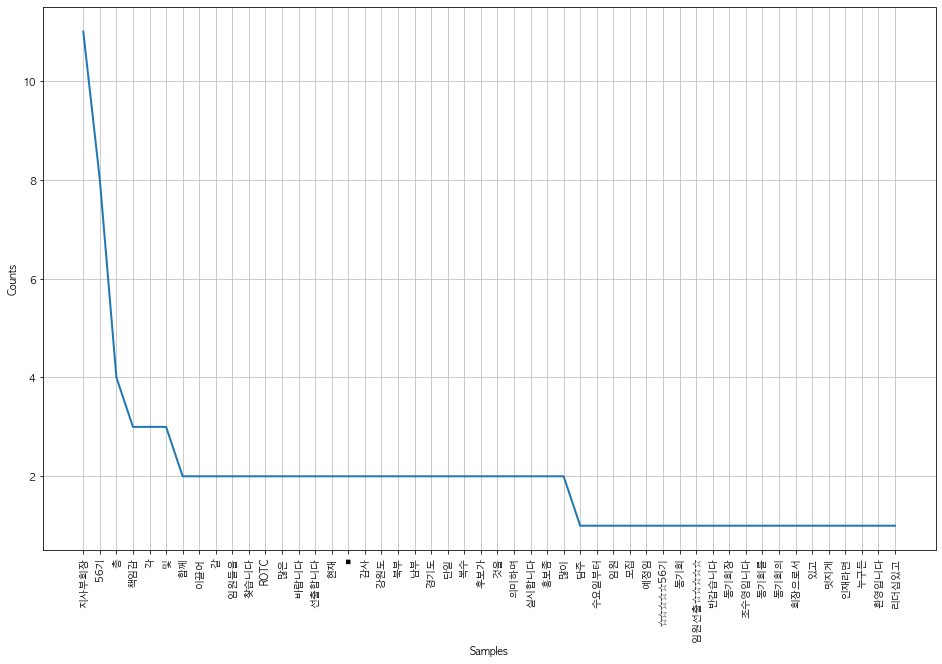

In [16]:
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc
%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == "Darwin":
    rc('font', family="AppleGothic")
elif platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')
    
plt.figure(figsize=(16, 10))
text.plot(50)

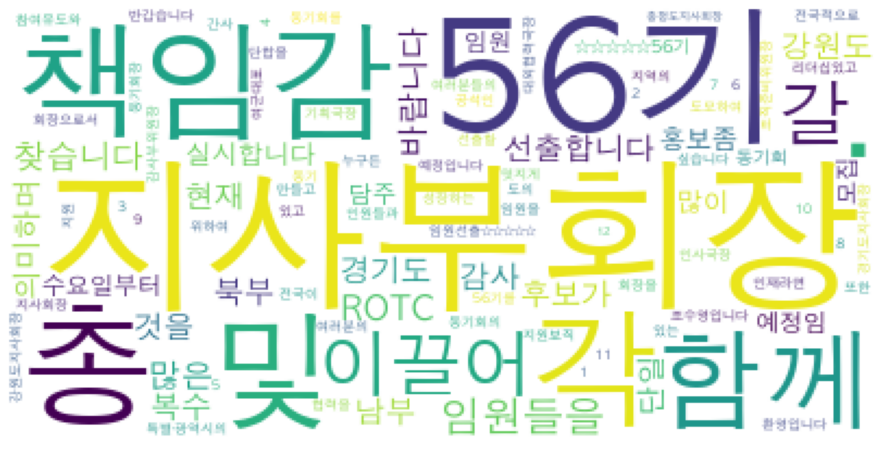

In [17]:
from wordcloud import WordCloud

wc = text.vocab().most_common(100)

wordcloud = WordCloud(font_path ='/Library/Fonts/AppleGothic.ttf',
                     relative_scaling = 0.2,
                     background_color='white'
                     ).generate_from_frequencies(dict(wc))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### 빈도 분석 내용을 하나의 함수로 합치기

In [22]:
def user_freq_analysis(username, data, author2doc):
    
    user_msg = [str(data["Message"][idx]) for idx in author2doc[username]]
    total_tokens = [token for doc in user_msg for token in doc.split()]
    text = nltk.Text(total_tokens, name="kakao")
    
    path = "c:/Windows/Fonts/malgun.ttf"
    if platform.system() == "Darwin":
        rc('font', family="AppleGothic")
    elif platform.system() == "Windows":
        font_name = font_manager.FontProperties(fname=path).get_name()
        rc('font', family=font_name)
    else:
        print('Unknown system... sorry~~~~')
    
    plt.figure(figsize=(16, 10))
    text.plot(50)
    
    wc = text.vocab().most_common(100)
    
    wordcloud = WordCloud(font_path ='/Library/Fonts/AppleGothic.ttf',
                     relative_scaling = 0.2,
                     background_color='white'
                     ).generate_from_frequencies(dict(wc))
    plt.figure(figsize=(16,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

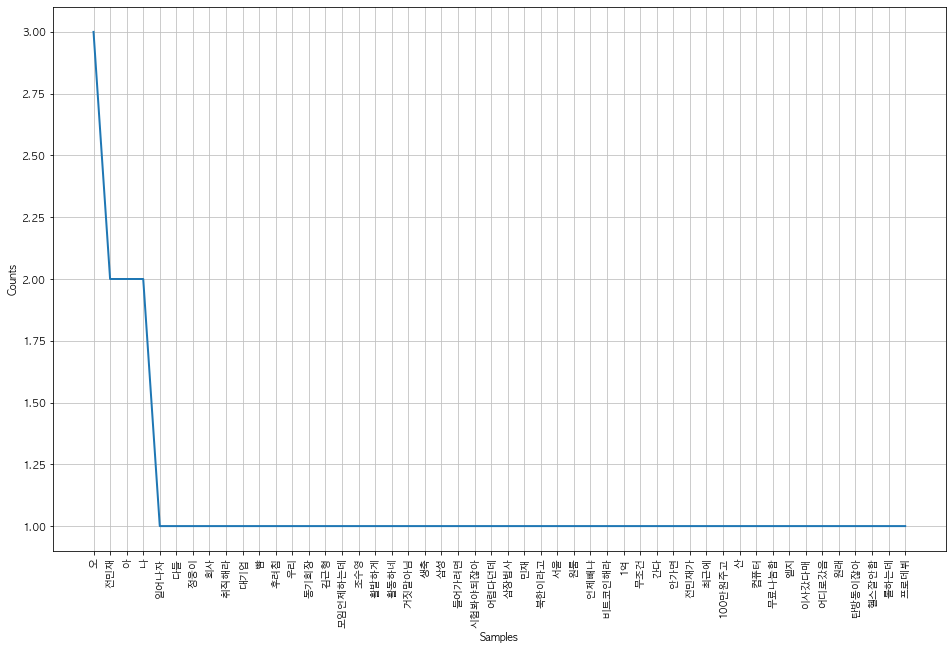

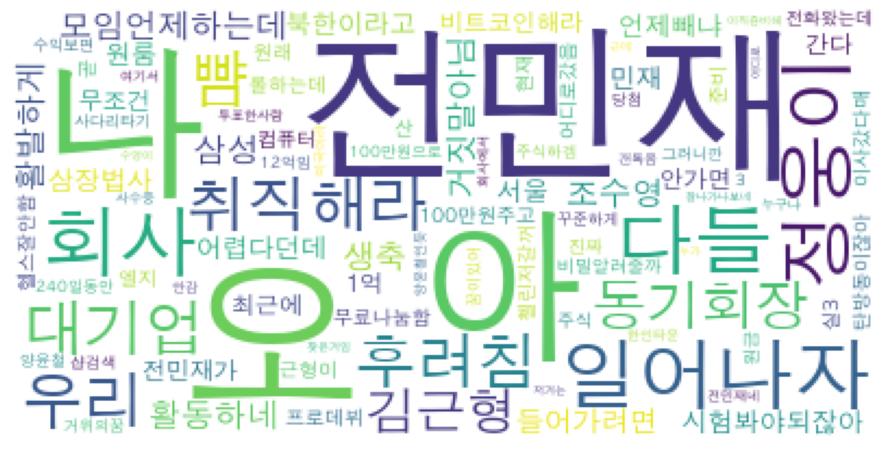

In [26]:
# 함수 테스트
user_freq_analysis("Rt법학차진영", data, author2doc)